In [7]:
!pip install pdpbox
!pip install shap
!pip install eli5

Processing c:\users\wbblo\appdata\local\pip\cache\wheels\35\fb\ef\a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb\pdpbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\wbblo\anaconda3\lib\site-packages\__pycache__\pylab.cpython-38.pyc
   from C:\Users\wbblo\AppData\Local\Temp\pip-uninstall-v05b2hsi\pylab.cpython-38.pyc
  Moving to c:\users\wbblo\anaconda3\lib\site-packages\matplotlib-3.3.2-py3.8-nspkg.pth
   from C:\Users\wbblo\AppData\Local\Temp\pip-uninstall-59udnlgx\matplotlib-3.3.2-py3.8-nspkg.pth
  Moving to c:\users\wbblo\anaconda3\lib\si

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\wbblo\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\wbblo\\AppData\\Local\\Temp\\pip-install-tu5l_u4b\\matplotlib\\setup.py'"'"'; __file__='"'"'C:\\Users\\wbblo\\AppData\\Local\\Temp\\pip-install-tu5l_u4b\\matplotlib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\wbblo\AppData\Local\Temp\pip-wheel-qq9v_8j7'
       cwd: C:\Users\wbblo\AppData\Local\Temp\pip-install-tu5l_u4b\matplotlib\
  Complete output (540 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        python: yes [3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
  
  OPTIONAL SUBPACKAGES
   sample_data: yes [installing]
         tests:

    copying lib\matplotlib\mpl-data\fonts\ttf\STIXGeneralBol.ttf -> build\lib.win-amd64-3.8\matplotlib\mpl-data\fonts\ttf
    copying lib\matplotlib\backends\web_backend\jquery-ui-1.12.1\images\ui-icons_444444_256x240.png -> build\lib.win-amd64-3.8\matplotlib\backends\web_backend\jquery-ui-1.12.1\images
    copying lib\matplotlib\backends\web_backend\ipython_inline_figure.html -> build\lib.win-amd64-3.8\matplotlib\backends\web_backend
    copying lib\matplotlib\backends\web_backend\jquery-ui-1.12.1\jquery-ui.js -> build\lib.win-amd64-3.8\matplotlib\backends\web_backend\jquery-ui-1.12.1
    copying lib\matplotlib\mpl-data\images\qt4_editor_options.svg -> build\lib.win-amd64-3.8\matplotlib\mpl-data\images
    copying lib\matplotlib\mpl-data\fonts\afm\pagk8a.afm -> build\lib.win-amd64-3.8\matplotlib\mpl-data\fonts\afm
    copying lib\matplotlib\backends\web_backend\jquery-ui-1.12.1\jquery-ui.css -> build\lib.win-amd64-3.8\matplotlib\backends\web_backend\jquery-ui-1.12.1
    copying lib\ma

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import sklearn as sk
import csv
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
# https://www.kaggle.com/dansbecker/partial-plots

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
# https://www.kaggle.com/dansbecker/permutation-importance

ModuleNotFoundError: No module named 'pdpbox'

In [10]:
# importing the dataset into a variable
dataset = pd.read_csv('data/heart.csv')

print(len(dataset))
print(dataset.head())
print(dataset.shape)
print(dataset.columns)

# Now we will drop the values that have na’s.
dataset.dropna()
print(dataset.shape)
# There appears to be no na's because the shape of the dataset does not change, which means no elements have been dropped.

# we change the column names for clearity and convenient use.
dataset.columns = ['age', 'sex', 'chest_pain', 'rest_bloodpressure', 'cholesterol', 'fasting_bloodsugar', 'rest_elec_cardio_graphic', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

print(dataset.columns)

print(dataset.dtypes)

# We drop age because if you look closely at the age factor, there are very few young people, and they indeed have higher rates of disease. This clearly contradicts common sense and is most likely due to selection bias in the study.
dataset = dataset.drop(dataset.columns[[0]], axis=1)

print(dataset.head())

1025
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(1025, 14)
Index(['age', 'sex', 'chest_pain', 'rest_bloodpressure', 'cholesterol',
       'fasting_bloodsugar', 'rest_elec_cardio_graphic',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_d

#### after importing and pre processing the data, we compare some classifiers

In [11]:
# First we build a Decision Tree and print the corresponding f1 scores

# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
X_train ,X_test, y_train, y_test= train_test_split(dataset.drop('target', 1), dataset['target'], test_size = .2, random_state=10)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Evaluation on Training set
dtc_pred_train = dtc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,dtc_pred_train))

# Evaluating on Test set
dtc_pred_test = dtc.predict(X_test)
print('Test Set Evaluation F1-Score=>',f1_score(y_test,dtc_pred_test))


Training Set Evaluation F1-Score=> 1.0
Test Set Evaluation F1-Score=> 1.0


In [12]:
# Now we build a Random Forest Classifier and also print its corresponding f1 scores, and we compare them to the scores of
# the decision tree

# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 1.0


### They both get the same scores for the training and testing set, so it seems that it doesnt really matter which one we use. We choose to use the random forest classifier because the random forests (classiefier) combines the simplicity of decision trees with fexibility resulting in a vast improvement in accuracy.


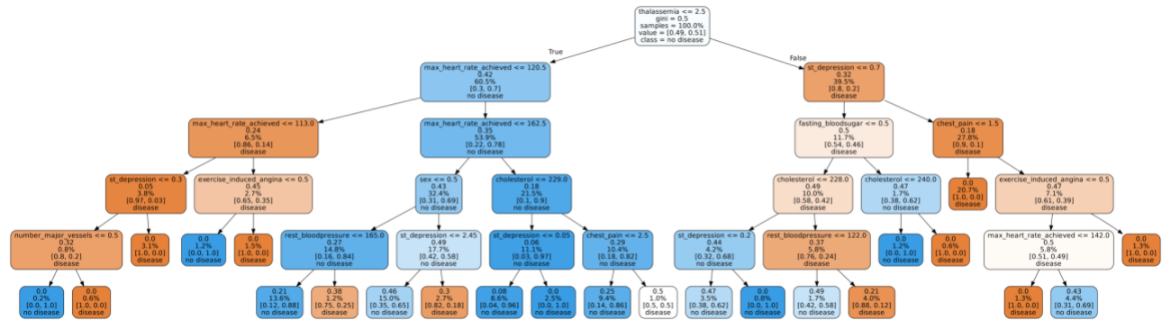

In [33]:
# We create and print the random forest tree classiefier on our dataset
# Max depth is set to 5 to prevent overfitting (which happens at max depth > 5)
# source: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', 1), dataset['target'], test_size = .2, random_state=42)

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

# changing the target values for 1 to heart disease and 0 to no heart disease for readability:
y_train_string = y_train.astype('str')
y_train_string[y_train_string == '1'] = 'heart disease'
y_train_string[y_train_string == '0'] = 'no heart disease'
y_train_string = y_train_string.values

export_graphviz(estimator, out_file='tree.dot', feature_names = feature_names,class_names = y_train_string,rounded = True, proportion = True, label='root',precision = 2, filled = True)


# Now that the random forest is stored in the tree.dot file, lets create an image from the file for visualisation:

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'test.png', '-Gdpi=600'], shell=True)

from IPython.display import Image
Image(filename = 'tree.png')

### This forest classifier looks good, lets now create the confusion matrix and its sensitifity and specificity values


In [14]:

y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix


array([[83, 19],
       [ 6, 97]], dtype=int64)

the confusion matrix looks good, now we calculate the Sensitivity and Specificity.


In [15]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9325842696629213
Specificity :  0.8362068965517241


0.9563106796116505

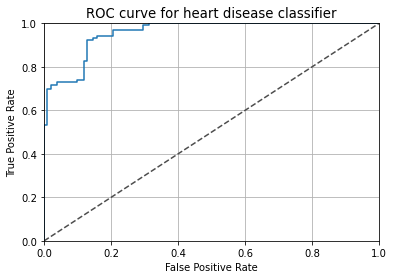

In [16]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 11
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate') # 1 - Specificity
plt.ylabel('True Positive Rate') # Sensitivity
plt.grid(True)

# Getting the value for area under the curve
# https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
# 'The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.'
auc(fpr, tpr) 

source: https://www.statology.org/what-is-a-good-auc-score/

Another common metric is the *Area Under the Curve*, often denoted as *AUC*. 
THe AUC is a good and convienent way to get the performence of a model in a single number. As general-principle, we take that:

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail


The ROC gives us:

In [17]:
auc(fpr, tpr)

0.9563106796116505

## The score is in the excellent range, so is works well. The accuracy of this model is good.

## Now lets take a look at the attributes and how changing their values influences the risk on getting a heart disease. Explaination is provided in the report.



In [18]:
base_features = dataset.columns.values.tolist()
base_features.remove('target')

feat_name = 'sex'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [19]:

feat_name = 'chest_pain'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [20]:
feat_name = 'rest_bloodpressure'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [21]:
feat_name = 'cholesterol'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [22]:
feat_name = 'fasting_bloodsugar'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [23]:
feat_name = 'rest_elec_cardio_graphic'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [24]:
feat_name = 'max_heart_rate_achieved'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [25]:
feat_name = 'exercise_induced_angina'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [26]:
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [27]:
feat_name = 'st_slope'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [28]:
feat_name = 'number_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

In [29]:
feat_name = 'thalassemia'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

NameError: name 'pdp' is not defined

## We use shap to build a plot which shows the attributes that have the most impact on the target value ( whether a person has a heart disease or not)
https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html

In [30]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

NameError: name 'shap' is not defined

The three
attributes that have the most impact on the outcome of our model are: chest pain, number of major
vessels and thalassemia.
 This is as predicted. we also see that the sex attribute is not that important.